In [6]:
# Import modules
import os
import warnings
warnings.simplefilter("ignore", UserWarning)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.signal as ss
import numpy as np

In [ ]:
# Directories and files
# File Names
TEST_NUMBER = "test1"
FILE_PEARSON = "../peak_price_pearson_{}.csv".format(TEST_NUMBER)
FILE_NCC = "../peak_price_ncc_{}.csv".format(TEST_NUMBER)
FILE_PCT = "../peak_price_pct_{}.csv".format(TEST_NUMBER)
DATA_DIR = "../../data/combined/"

In [7]:
# Load Data File List
file_list = os.listdir(DATA_DIR)
noisy = ['000050','000180','001070', '001800', '001940', '002220', '002410', '002840', '002870', '002900', '003080', '003090', '003410',
         '003610', '003850', '004410', '004990', '005300', '005720', '005740', '005930', '010100', '010660', '012030', '013360', '013520',
          '013700', '014280', '014530', '017810', '018880', '023450', '027410', '035420', '044450', '095570', '104700', '107590', '138250',
          '144620', '161000', '204320', '284740']

file_list = [f for f in file_list if f[:-4] not in noisy]
codes_list = [f[:-4] for f in file_list if f[:-4] not in noisy]

In [9]:
def ccf(x, y, lag_max = 100):
    result = ss.correlate(y - np.mean(y), x - np.mean(x), method='direct') / (np.std(y) * np.std(x) * len(y))
    length = (len(result) - 1) // 2
    lo = length - lag_max
    hi = length + (lag_max + 1)

    return result[lo:hi]

In [26]:
ncc_pct_list = []
lag_pct_list = []
company_values = {}
lag = 7
scale_columns = ['volume', 'price', 'ratio']

for file in file_list:
    # Load File
    filepath= DATA_DIR + file
    df = pd.read_csv(filepath, index_col=0)
    df[scale_columns] -= df[scale_columns].min()
    df[scale_columns] /= df[scale_columns].max()
    print(file)
    # print(df.head())
    df = df.dropna()
    
    peaks = ss.find_peaks(df['ratio'].values, distance=7)[0]
    top_peaks = df.iloc[peaks,:]
    top_peaks = top_peaks.nlargest(20, 'ratio')
    print(top_peaks)
    
    top_timeframes = {}
    # print(top_ten)
    
    # Create timeframe for each peak
    for idx, row in peaks.iterrows():
        # print(row)
        start = idx-lag 
        end = idx+lag
        if start < 0 or end > len(df.index):
            continue
        print("Start: ", start, "End: ", end)
        timeframe = df[start:end]
        top_timeframes[row['period']] = timeframe
        
    # print(top_timeframes)
        
    # Calculate cross correlation
    top_ncc = {}
    for peak, timeframe in top_timeframes.items():
        volume = timeframe['volume'].values
        ratio = timeframe['ratio'].values    
        ncc = ccf(volume,ratio,lag_max=lag)
        max_idx = np.argmax(abs(ncc))
        max_ncc = ncc[max_idx]
        max_lag = max_idx - lag 
        top_ncc[peak] = {
            "ncc": list(ncc),
            "max": [max_ncc, max_lag]
        }
        ncc_pct_list.append(max_ncc)
        lag_pct_list.append(max_lag)
        
    company_values[file[:-4]] = top_ncc
    # print(company_values)
    # print(file, max_ncc, max_lag)

000020.csv
Start:  263 End:  277
Start:  375 End:  389
Start:  255 End:  269
Start:  987 End:  1001
Start:  277 End:  291
Start:  704 End:  718
Start:  530 End:  544
Start:  347 End:  361
Start:  678 End:  692
Start:  45 End:  59
Start:  1187 End:  1201
Start:  270 End:  284
Start:  508 End:  522
Start:  693 End:  707
Start:  1176 End:  1190
Start:  872 End:  886
Start:  306 End:  320
Start:  383 End:  397
Start:  55 End:  69
Start:  518 End:  532
000040.csv
Start:  530 End:  544
Start:  987 End:  1001
Start:  704 End:  718
Start:  693 End:  707
Start:  678 End:  692
Start:  663 End:  677
Start:  811 End:  825
Start:  686 End:  700
Start:  620 End:  634
Start:  833 End:  847
Start:  980 End:  994
Start:  753 End:  767
Start:  997 End:  1011
Start:  549 End:  563
Start:  571 End:  585
Start:  563 End:  577
Start:  641 End:  655
Start:  521 End:  535
Start:  556 End:  570
000060.csv
Start:  700 End:  714
Start:  711 End:  725
Start:  809 End:  823
Start:  720 End:  734
Start:  735 End:  

C:\Users\bon12\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


000390.csv
Start:  257 End:  271
Start:  249 End:  263
Start:  139 End:  153
Start:  843 End:  857
Start:  1151 End:  1165
Start:  181 End:  195
Start:  97 End:  111
Start:  858 End:  872
Start:  116 End:  130
Start:  270 End:  284
Start:  130 End:  144
Start:  153 End:  167
Start:  343 End:  357
Start:  871 End:  885
Start:  306 End:  320
Start:  753 End:  767
Start:  493 End:  507
Start:  279 End:  293
Start:  196 End:  210
Start:  677 End:  691
000400.csv
Start:  427 End:  441
Start:  964 End:  978
Start:  1256 End:  1270
Start:  808 End:  822
Start:  444 End:  458
Start:  308 End:  322
Start:  488 End:  502
Start:  655 End:  669
Start:  1027 End:  1041
Start:  301 End:  315
Start:  465 End:  479
Start:  452 End:  466
Start:  437 End:  451
Start:  475 End:  489
Start:  1137 End:  1151
Start:  937 End:  951
Start:  1014 End:  1028
Start:  374 End:  388
Start:  325 End:  339
Start:  381 End:  395
000430.csv
Start:  427 End:  441
Start:  444 End:  458
Start:  488 End:  502
Start:  378 

000970.csv
Start:  1042 End:  1056
Start:  847 End:  861
Start:  769 End:  783
Start:  836 End:  850
Start:  1133 End:  1147
Start:  1049 End:  1063
Start:  994 End:  1008
Start:  855 End:  869
Start:  828 End:  842
Start:  1056 End:  1070
Start:  1163 End:  1177
Start:  715 End:  729
Start:  1065 End:  1079
Start:  170 End:  184
Start:  219 End:  233
Start:  794 End:  808
Start:  143 End:  157
Start:  1328 End:  1342
Start:  510 End:  524
Start:  1105 End:  1119
000990.csv
Start:  1230 End:  1244
Start:  643 End:  657
Start:  625 End:  639
Start:  553 End:  567
Start:  103 End:  117
Start:  63 End:  77
Start:  116 End:  130
Start:  273 End:  287
Start:  13 End:  27
Start:  82 End:  96
Start:  48 End:  62
Start:  1180 End:  1194
Start:  564 End:  578
Start:  215 End:  229
Start:  1348 End:  1362
Start:  38 End:  52
Start:  264 End:  278
Start:  668 End:  682
Start:  581 End:  595
001020.csv
Start:  642 End:  656
Start:  77 End:  91
Start:  138 End:  152
Start:  215 End:  229
Start:  20

001420.csv
Start:  871 End:  885
Start:  845 End:  859
Start:  270 End:  284
Start:  836 End:  850
Start:  857 End:  871
Start:  756 End:  770
Start:  886 End:  900
Start:  412 End:  426
Start:  1025 End:  1039
Start:  144 End:  158
Start:  137 End:  151
Start:  395 End:  409
Start:  69 End:  83
Start:  921 End:  935
Start:  971 End:  985
Start:  993 End:  1007
Start:  878 End:  892
Start:  641 End:  655
Start:  794 End:  808
Start:  55 End:  69
001430.csv
Start:  819 End:  833
Start:  220 End:  234
Start:  1218 End:  1232
Start:  1232 End:  1246
Start:  714 End:  728
Start:  759 End:  773
Start:  832 End:  846
Start:  1241 End:  1255
Start:  399 End:  413
Start:  566 End:  580
Start:  538 End:  552
Start:  1150 End:  1164
Start:  207 End:  221
Start:  1211 End:  1225
Start:  800 End:  814
Start:  839 End:  853
Start:  770 End:  784
Start:  793 End:  807
Start:  574 End:  588
001440.csv
Start:  591 End:  605
Start:  971 End:  985
Start:  662 End:  676
Start:  47 End:  61
Start:  241 En

001820.csv
Start:  281 End:  295
Start:  80 End:  94
Start:  90 End:  104
Start:  547 End:  561
Start:  615 End:  629
Start:  105 End:  119
Start:  97 End:  111
Start:  185 End:  199
Start:  112 End:  126
Start:  139 End:  153
Start:  198 End:  212
Start:  132 End:  146
Start:  156 End:  170
Start:  345 End:  359
Start:  392 End:  406
Start:  176 End:  190
Start:  223 End:  237
Start:  125 End:  139
Start:  632 End:  646
Start:  164 End:  178
001880.csv
Start:  521 End:  535
Start:  489 End:  503
Start:  609 End:  623
Start:  448 End:  462
Start:  978 End:  992
Start:  437 End:  451
Start:  838 End:  852
Start:  545 End:  559
Start:  528 End:  542
Start:  990 End:  1004
Start:  511 End:  525
Start:  1027 End:  1041
Start:  864 End:  878
Start:  1035 End:  1049
Start:  724 End:  738
Start:  1047 End:  1061
Start:  691 End:  705
Start:  537 End:  551
Start:  501 End:  515
Start:  622 End:  636
002020.csv
Start:  518 End:  532
Start:  923 End:  937
Start:  559 End:  573
Start:  536 End:  

002450.csv
Start:  1295 End:  1309
Start:  1302 End:  1316
Start:  1312 End:  1326
Start:  1320 End:  1334
Start:  689 End:  703
Start:  1285 End:  1299
Start:  1273 End:  1287
Start:  888 End:  902
Start:  1329 End:  1343
Start:  91 End:  105
Start:  188 End:  202
Start:  1336 End:  1350
Start:  1349 End:  1363
Start:  734 End:  748
Start:  1217 End:  1231
Start:  1190 End:  1204
Start:  816 End:  830
Start:  907 End:  921
Start:  1201 End:  1215
Start:  159 End:  173
002460.csv
Start:  749 End:  763
Start:  1049 End:  1063
Start:  1083 End:  1097
Start:  1175 End:  1189
Start:  1092 End:  1106
Start:  1193 End:  1207
Start:  1099 End:  1113
Start:  764 End:  778
Start:  771 End:  785
Start:  1142 End:  1156
Start:  1253 End:  1267
Start:  1204 End:  1218
Start:  1112 End:  1126
Start:  783 End:  797
Start:  83 End:  97
Start:  1056 End:  1070
Start:  1212 End:  1226
Start:  1245 End:  1259
Start:  1186 End:  1200
Start:  67 End:  81
002600.csv
Start:  456 End:  470
Start:  770 End:  

003070.csv
Start:  707 End:  721
Start:  780 End:  794
Start:  812 End:  826
Start:  557 End:  571
Start:  690 End:  704
Start:  607 End:  621
Start:  804 End:  818
Start:  528 End:  542
Start:  741 End:  755
Start:  627 End:  641
Start:  1193 End:  1207
Start:  566 End:  580
Start:  700 End:  714
Start:  795 End:  809
Start:  756 End:  770
Start:  374 End:  388
Start:  546 End:  560
Start:  787 End:  801
Start:  504 End:  518
Start:  822 End:  836
003120.csv
Start:  17 End:  31
Start:  297 End:  311
Start:  993 End:  1007
Start:  389 End:  403
Start:  28 End:  42
Start:  52 End:  66
Start:  10 End:  24
Start:  144 End:  158
Start:  123 End:  137
Start:  1057 End:  1071
Start:  641 End:  655
Start:  3 End:  17
Start:  38 End:  52
Start:  108 End:  122
Start:  327 End:  341
Start:  381 End:  395
Start:  199 End:  213
Start:  374 End:  388
Start:  276 End:  290
003160.csv
Start:  1158 End:  1172
Start:  214 End:  228
Start:  457 End:  471
Start:  1118 End:  1132
Start:  884 End:  898
Sta

003580.csv
Start:  769 End:  783
Start:  756 End:  770
Start:  798 End:  812
Start:  985 End:  999
Start:  782 End:  796
Start:  1043 End:  1057
Start:  995 End:  1009
Start:  1058 End:  1072
Start:  1030 End:  1044
Start:  1050 End:  1064
Start:  810 End:  824
Start:  827 End:  841
Start:  1071 End:  1085
Start:  901 End:  915
Start:  1007 End:  1021
Start:  818 End:  832
Start:  872 End:  886
Start:  1020 End:  1034
Start:  837 End:  851
Start:  909 End:  923
003620.csv
Start:  836 End:  850
Start:  864 End:  878
Start:  144 End:  158
Start:  420 End:  434
Start:  468 End:  482
Start:  48 End:  62
Start:  75 End:  89
Start:  263 End:  277
Start:  82 End:  96
Start:  89 End:  103
Start:  270 End:  284
Start:  61 End:  75
Start:  200 End:  214
Start:  68 End:  82
Start:  182 End:  196
Start:  241 End:  255
Start:  598 End:  612
Start:  173 End:  187
Start:  10 End:  24
003650.csv
Start:  32 End:  46
Start:  1113 End:  1127
Start:  250 End:  264
Start:  920 End:  934
Start:  634 End:  6

Start:  1145 End:  1159
Start:  1131 End:  1145
Start:  746 End:  760
Start:  1061 End:  1075
Start:  845 End:  859
Start:  871 End:  885
Start:  853 End:  867
Start:  1153 End:  1167
Start:  796 End:  810
Start:  1070 End:  1084
Start:  217 End:  231
Start:  1109 End:  1123
Start:  805 End:  819
Start:  1167 End:  1181
Start:  760 End:  774
Start:  777 End:  791
Start:  164 End:  178
Start:  882 End:  896
Start:  354 End:  368
Start:  1190 End:  1204
004310.csv
Start:  872 End:  886
Start:  857 End:  871
Start:  886 End:  900
Start:  879 End:  893
Start:  801 End:  815
Start:  864 End:  878
Start:  1098 End:  1112
Start:  972 End:  986
Start:  843 End:  857
Start:  832 End:  846
Start:  794 End:  808
Start:  497 End:  511
Start:  97 End:  111
Start:  900 End:  914
Start:  810 End:  824
Start:  459 End:  473
Start:  1126 End:  1140
Start:  951 End:  965
Start:  46 End:  60
Start:  320 End:  334
004360.csv
Start:  432 End:  446
Start:  377 End:  391
Start:  277 End:  291
Start:  780 End

004920.csv
Start:  432 End:  446
Start:  677 End:  691
Start:  467 End:  481
Start:  1144 End:  1158
Start:  787 End:  801
Start:  1074 End:  1088
Start:  417 End:  431
Start:  1040 End:  1054
Start:  560 End:  574
Start:  441 End:  455
Start:  802 End:  816
Start:  767 End:  781
Start:  739 End:  753
Start:  854 End:  868
Start:  424 End:  438
Start:  475 End:  489
Start:  532 End:  546
Start:  580 End:  594
Start:  1137 End:  1151
Start:  571 End:  585
004960.csv
Start:  1104 End:  1118
Start:  1116 End:  1130
Start:  843 End:  857
Start:  830 End:  844
Start:  858 End:  872
Start:  871 End:  885
Start:  1053 End:  1067
Start:  929 End:  943
Start:  1147 End:  1161
Start:  851 End:  865
Start:  1070 End:  1084
Start:  307 End:  321
Start:  1126 End:  1140
Start:  978 End:  992
Start:  1139 End:  1153
Start:  899 End:  913
Start:  886 End:  900
Start:  986 End:  1000
Start:  878 End:  892
Start:  1060 End:  1074
004970.csv
Start:  354 End:  368
Start:  391 End:  405
Start:  854 End:  

Start:  500 End:  514
Start:  930 End:  944
Start:  1063 End:  1077
Start:  795 End:  809
005610.csv
Start:  700 End:  714
Start:  15 End:  29
Start:  1109 End:  1123
Start:  1258 End:  1272
Start:  354 End:  368
Start:  361 End:  375
Start:  1116 End:  1130
Start:  179 End:  193
Start:  273 End:  287
Start:  896 End:  910
Start:  949 End:  963
Start:  46 End:  60
Start:  787 End:  801
Start:  33 End:  47
Start:  1133 End:  1147
Start:  1126 End:  1140
Start:  284 End:  298
Start:  1182 End:  1196
Start:  755 End:  769
Start:  711 End:  725
005680.csv
Start:  126 End:  140
Start:  280 End:  294
Start:  1194 End:  1208
Start:  647 End:  661
Start:  622 End:  636
Start:  819 End:  833
Start:  206 End:  220
Start:  235 End:  249
Start:  495 End:  509
Start:  1215 End:  1229
Start:  262 End:  276
Start:  216 End:  230
Start:  572 End:  586
Start:  881 End:  895
Start:  224 End:  238
Start:  444 End:  458
Start:  629 End:  643
Start:  270 End:  284
Start:  248 End:  262
005690.csv
Start:  7

Start:  1011 End:  1025
Start:  1019 End:  1033
Start:  1029 End:  1043
Start:  1327 End:  1341
Start:  1040 End:  1054
Start:  1193 End:  1207
Start:  1048 End:  1062
Start:  1167 End:  1181
Start:  1116 End:  1130
Start:  1160 End:  1174
Start:  1201 End:  1215
Start:  1186 End:  1200
Start:  1348 End:  1362
Start:  1140 End:  1154
Start:  1061 End:  1075
Start:  1069 End:  1083
Start:  1098 End:  1112
Start:  1151 End:  1165
Start:  1246 End:  1260
Start:  1130 End:  1144
006280.csv
Start:  595 End:  609
Start:  697 End:  711
Start:  132 End:  146
Start:  605 End:  619
Start:  649 End:  663
Start:  616 End:  630
Start:  677 End:  691
Start:  689 End:  703
Start:  657 End:  671
Start:  81 End:  95
Start:  768 End:  782
Start:  705 End:  719
Start:  668 End:  682
Start:  116 End:  130
Start:  752 End:  766
Start:  1180 End:  1194
Start:  726 End:  740
Start:  719 End:  733
Start:  627 End:  641
Start:  739 End:  753
006340.csv
Start:  662 End:  676
Start:  816 End:  830
Start:  886 En

007160.csv
Start:  52 End:  66
Start:  171 End:  185
Start:  41 End:  55
Start:  10 End:  24
Start:  3 End:  17
Start:  17 End:  31
Start:  24 End:  38
Start:  641 End:  655
Start:  59 End:  73
Start:  34 End:  48
Start:  103 End:  117
Start:  389 End:  403
Start:  843 End:  857
Start:  993 End:  1007
Start:  73 End:  87
Start:  1313 End:  1327
Start:  1179 End:  1193
Start:  754 End:  768
Start:  725 End:  739
007210.csv
Start:  414 End:  428
Start:  79 End:  93
Start:  463 End:  477
Start:  424 End:  438
Start:  198 End:  212
Start:  450 End:  464
Start:  163 End:  177
Start:  170 End:  184
Start:  67 End:  81
Start:  434 End:  448
Start:  127 End:  141
Start:  98 End:  112
Start:  88 End:  102
Start:  399 End:  413
Start:  253 End:  267
Start:  443 End:  457
Start:  372 End:  386
Start:  289 End:  303
Start:  480 End:  494
Start:  492 End:  506
007280.csv
Start:  760 End:  774
Start:  174 End:  188
Start:  516 End:  530
Start:  26 End:  40
Start:  1211 End:  1225
Start:  74 End:  88

Start:  895 End:  909
Start:  153 End:  167
Start:  346 End:  360
008260.csv
Start:  178 End:  192
Start:  1061 End:  1075
Start:  1117 End:  1131
Start:  103 End:  117
Start:  242 End:  256
Start:  202 End:  216
Start:  60 End:  74
Start:  977 End:  991
Start:  1294 End:  1308
Start:  40 End:  54
Start:  17 End:  31
Start:  0 End:  14
Start:  306 End:  320
Start:  27 End:  41
Start:  47 End:  61
Start:  755 End:  769
Start:  7 End:  21
Start:  82 End:  96
Start:  697 End:  711
Start:  69 End:  83
008350.csv
Start:  1349 End:  1363
Start:  1243 End:  1257
Start:  811 End:  825
Start:  1196 End:  1210
Start:  801 End:  815
Start:  1139 End:  1153
Start:  1109 End:  1123
Start:  684 End:  698
Start:  1187 End:  1201
Start:  273 End:  287
Start:  558 End:  572
Start:  1252 End:  1266
Start:  1309 End:  1323
Start:  845 End:  859
Start:  411 End:  425
Start:  508 End:  522
Start:  1287 End:  1301
Start:  864 End:  878
Start:  693 End:  707
Start:  818 End:  832
008420.csv
Start:  1243 End:

009270.csv
Start:  25 End:  39
Start:  126 End:  140
Start:  518 End:  532
Start:  395 End:  409
Start:  510 End:  524
Start:  77 End:  91
Start:  404 End:  418
Start:  70 End:  84
Start:  222 End:  236
Start:  5 End:  19
Start:  970 End:  984
Start:  503 End:  517
Start:  35 End:  49
Start:  1349 End:  1363
Start:  665 End:  679
Start:  557 End:  571
Start:  586 End:  600
Start:  748 End:  762
Start:  895 End:  909
Start:  529 End:  543
009290.csv
Start:  224 End:  238
Start:  248 End:  262
Start:  1319 End:  1333
Start:  256 End:  270
Start:  25 End:  39
Start:  241 End:  255
Start:  270 End:  284
Start:  1307 End:  1321
Start:  395 End:  409
Start:  895 End:  909
Start:  332 End:  346
Start:  126 End:  140
Start:  217 End:  231
Start:  346 End:  360
Start:  353 End:  367
Start:  363 End:  377
Start:  913 End:  927
Start:  278 End:  292
Start:  586 End:  600
009310.csv
Start:  1319 End:  1333
Start:  396 End:  410
Start:  1228 End:  1242
Start:  1349 End:  1363
Start:  895 End:  909


010140.csv
Start:  151 End:  165
Start:  1193 End:  1207
Start:  63 End:  77
Start:  168 End:  182
Start:  160 End:  174
Start:  182 End:  196
Start:  130 End:  144
Start:  312 End:  326
Start:  1169 End:  1183
Start:  1183 End:  1197
Start:  139 End:  153
Start:  1251 End:  1265
Start:  221 End:  235
Start:  201 End:  215
Start:  305 End:  319
Start:  192 End:  206
Start:  55 End:  69
Start:  27 End:  41
Start:  41 End:  55
010400.csv
Start:  104 End:  118
Start:  68 End:  82
Start:  140 End:  154
Start:  122 End:  136
Start:  290 End:  304
Start:  61 End:  75
Start:  150 End:  164
Start:  89 End:  103
Start:  129 End:  143
Start:  96 End:  110
Start:  325 End:  339
Start:  34 End:  48
Start:  26 End:  40
Start:  361 End:  375
Start:  45 End:  59
Start:  174 End:  188
Start:  185 End:  199
Start:  297 End:  311
Start:  164 End:  178
010420.csv
Start:  753 End:  767
Start:  1034 End:  1048
Start:  809 End:  823
Start:  256 End:  270
Start:  47 End:  61
Start:  679 End:  693
Start:  75 

Start:  475 End:  489
Start:  979 End:  993
Start:  528 End:  542
Start:  1221 End:  1235
Start:  488 End:  502
Start:  1193 End:  1207
Start:  242 End:  256
Start:  264 End:  278
Start:  271 End:  285
Start:  403 End:  417
Start:  1056 End:  1070
Start:  1083 End:  1097
Start:  234 End:  248
Start:  95 End:  109
Start:  536 End:  550
Start:  102 End:  116
Start:  445 End:  459
Start:  959 End:  973
Start:  623 End:  637
Start:  312 End:  326
011280.csv
Start:  1218 End:  1232
Start:  1239 End:  1253
Start:  216 End:  230
Start:  913 End:  927
Start:  1007 End:  1021
Start:  984 End:  998
Start:  997 End:  1011
Start:  972 End:  986
Start:  1306 End:  1320
Start:  227 End:  241
Start:  1225 End:  1239
Start:  1015 End:  1029
Start:  1326 End:  1340
Start:  1033 End:  1047
Start:  567 End:  581
Start:  236 End:  250
Start:  920 End:  934
Start:  1253 End:  1267
Start:  439 End:  453
Start:  203 End:  217
011300.csv
Start:  260 End:  274
Start:  221 End:  235
Start:  214 End:  228
Start:

012450.csv
Start:  1001 End:  1015
Start:  76 End:  90
Start:  108 End:  122
Start:  805 End:  819
Start:  791 End:  805
Start:  845 End:  859
Start:  892 End:  906
Start:  965 End:  979
Start:  773 End:  787
Start:  460 End:  474
Start:  391 End:  405
Start:  885 End:  899
Start:  784 End:  798
Start:  875 End:  889
Start:  976 End:  990
Start:  854 End:  868
Start:  836 End:  850
Start:  899 End:  913
Start:  823 End:  837
Start:  923 End:  937
012510.csv
Start:  26 End:  40
Start:  59 End:  73
Start:  37 End:  51
Start:  134 End:  148
Start:  212 End:  226
Start:  152 End:  166
Start:  50 End:  64
Start:  85 End:  99
Start:  78 End:  92
Start:  67 End:  81
Start:  120 End:  134
Start:  109 End:  123
Start:  177 End:  191
Start:  162 End:  176
Start:  288 End:  302
Start:  95 End:  109
Start:  253 End:  267
Start:  141 End:  155
Start:  220 End:  234
Start:  204 End:  218
012600.csv
Start:  1141 End:  1155
Start:  405 End:  419
Start:  1151 End:  1165
Start:  397 End:  411
Start:  33

Start:  972 End:  986
Start:  1298 End:  1312
Start:  171 End:  185
Start:  1074 End:  1088
Start:  920 End:  934
Start:  91 End:  105
Start:  143 End:  157
Start:  983 End:  997
014990.csv
Start:  1296 End:  1310
Start:  574 End:  588
Start:  1305 End:  1319
Start:  183 End:  197
Start:  217 End:  231
Start:  1244 End:  1258
Start:  581 End:  595
Start:  554 End:  568
Start:  140 End:  154
Start:  107 End:  121
Start:  407 End:  421
Start:  1263 End:  1277
Start:  1252 End:  1266
Start:  1313 End:  1327
Start:  948 End:  962
Start:  161 End:  175
Start:  471 End:  485
Start:  884 End:  898
Start:  1195 End:  1209
Start:  50 End:  64
015020.csv
Start:  179 End:  193
Start:  580 End:  594
Start:  662 End:  676
Start:  1102 End:  1116
Start:  172 End:  186
Start:  1285 End:  1299
Start:  592 End:  606
Start:  655 End:  669
Start:  273 End:  287
Start:  641 End:  655
Start:  1294 End:  1308
Start:  860 End:  874
Start:  286 End:  300
Start:  1253 End:  1267
Start:  160 End:  174
Start:  1

Start:  871 End:  885
Start:  171 End:  185
Start:  1131 End:  1145
Start:  852 End:  866
Start:  885 End:  899
Start:  679 End:  693
Start:  748 End:  762
Start:  396 End:  410
Start:  815 End:  829
Start:  535 End:  549
Start:  782 End:  796
Start:  514 End:  528
Start:  1034 End:  1048
Start:  1118 End:  1132
Start:  46 End:  60
016880.csv
Start:  672 End:  686
Start:  860 End:  874
Start:  871 End:  885
Start:  832 End:  846
Start:  886 End:  900
Start:  845 End:  859
Start:  1074 End:  1088
Start:  704 End:  718
Start:  665 End:  679
Start:  679 End:  693
Start:  853 End:  867
Start:  977 End:  991
Start:  878 End:  892
Start:  1309 End:  1323
Start:  1118 End:  1132
Start:  1126 End:  1140
Start:  697 End:  711
Start:  893 End:  907
Start:  903 End:  917
Start:  985 End:  999
017040.csv
Start:  979 End:  993
Start:  1042 End:  1056
Start:  969 End:  983
Start:  1179 End:  1193
Start:  1145 End:  1159
Start:  1055 End:  1069
Start:  1188 End:  1202
Start:  154 End:  168
Start:  99

020000.csv
Start:  112 End:  126
Start:  489 End:  503
Start:  1200 End:  1214
Start:  707 End:  721
Start:  699 End:  713
Start:  510 End:  524
Start:  718 End:  732
Start:  754 End:  768
Start:  761 End:  775
Start:  1036 End:  1050
Start:  230 End:  244
Start:  174 End:  188
Start:  670 End:  684
Start:  685 End:  699
Start:  678 End:  692
Start:  242 End:  256
Start:  392 End:  406
Start:  798 End:  812
Start:  1249 End:  1263
Start:  348 End:  362
020120.csv
Start:  372 End:  386
Start:  543 End:  557
Start:  160 End:  174
Start:  1232 End:  1246
Start:  1142 End:  1156
Start:  1241 End:  1255
Start:  1274 End:  1288
Start:  1257 End:  1271
Start:  1267 End:  1281
Start:  331 End:  345
Start:  690 End:  704
Start:  1297 End:  1311
Start:  1225 End:  1239
Start:  869 End:  883
Start:  1205 End:  1219
Start:  507 End:  521
Start:  1158 End:  1172
Start:  1218 End:  1232
Start:  1283 End:  1297
Start:  80 End:  94
020150.csv
Start:  923 End:  937
Start:  773 End:  787
Start:  97 End:

024900.csv
Start:  488 End:  502
Start:  427 End:  441
Start:  445 End:  459
Start:  452 End:  466
Start:  698 End:  712
Start:  465 End:  479
Start:  472 End:  486
Start:  292 End:  306
Start:  480 End:  494
Start:  775 End:  789
Start:  391 End:  405
Start:  1092 End:  1106
Start:  244 End:  258
Start:  336 End:  350
Start:  299 End:  313
Start:  136 End:  150
Start:  326 End:  340
Start:  306 End:  320
Start:  649 End:  663
Start:  97 End:  111
025000.csv
Start:  427 End:  441
Start:  698 End:  712
Start:  445 End:  459
Start:  292 End:  306
Start:  452 End:  466
Start:  244 End:  258
Start:  488 End:  502
Start:  465 End:  479
Start:  102 End:  116
Start:  391 End:  405
Start:  475 End:  489
Start:  285 End:  299
Start:  299 End:  313
Start:  336 End:  350
Start:  255 End:  269
Start:  326 End:  340
Start:  437 End:  451
Start:  207 End:  221
Start:  306 End:  320
Start:  234 End:  248
025530.csv
Start:  959 End:  973
Start:  866 End:  880
Start:  1263 End:  1277
Start:  924 End:  

029460.csv
Start:  1055 End:  1069
Start:  406 End:  420
Start:  1079 End:  1093
Start:  551 End:  565
Start:  929 End:  943
Start:  1063 End:  1077
Start:  811 End:  825
Start:  1000 End:  1014
Start:  1335 End:  1349
Start:  134 End:  148
Start:  586 End:  600
Start:  1086 End:  1100
Start:  1070 End:  1084
Start:  308 End:  322
Start:  1202 End:  1216
Start:  110 End:  124
Start:  503 End:  517
Start:  159 End:  173
Start:  715 End:  729
Start:  69 End:  83
029530.csv
Start:  245 End:  259
Start:  264 End:  278
Start:  108 End:  122
Start:  236 End:  250
Start:  153 End:  167
Start:  124 End:  138
Start:  746 End:  760
Start:  406 End:  420
Start:  391 End:  405
Start:  115 End:  129
Start:  137 End:  151
Start:  503 End:  517
Start:  1118 End:  1132
Start:  199 End:  213
Start:  1098 End:  1112
Start:  768 End:  782
Start:  828 End:  842
Start:  700 End:  714
Start:  229 End:  243
Start:  355 End:  369
029780.csv
Start:  738 End:  752
Start:  752 End:  766
Start:  108 End:  122
Sta

033920.csv
Start:  1098 End:  1112
Start:  1321 End:  1335
Start:  831 End:  845
Start:  810 End:  824
Start:  1146 End:  1160
Start:  882 End:  896
Start:  1083 End:  1097
Start:  867 End:  881
Start:  818 End:  832
Start:  845 End:  859
Start:  852 End:  866
Start:  1013 End:  1027
Start:  860 End:  874
Start:  892 End:  906
Start:  1270 End:  1284
Start:  922 End:  936
Start:  1034 End:  1048
Start:  874 End:  888
Start:  908 End:  922
Start:  955 End:  969
034020.csv
Start:  1109 End:  1123
Start:  616 End:  630
Start:  748 End:  762
Start:  789 End:  803
Start:  489 End:  503
Start:  1076 End:  1090
Start:  1117 End:  1131
Start:  759 End:  773
Start:  832 End:  846
Start:  588 End:  602
Start:  782 End:  796
Start:  623 End:  637
Start:  1131 End:  1145
Start:  1090 End:  1104
Start:  684 End:  698
Start:  843 End:  857
Start:  804 End:  818
Start:  1138 End:  1152
Start:  1083 End:  1097
Start:  1146 End:  1160
034120.csv
Start:  80 End:  94
Start:  389 End:  403
Start:  782 End

039490.csv
Start:  334 End:  348
Start:  40 End:  54
Start:  312 End:  326
Start:  158 End:  172
Start:  49 End:  63
Start:  104 End:  118
Start:  146 End:  160
Start:  324 End:  338
Start:  293 End:  307
Start:  6 End:  20
Start:  66 End:  80
Start:  59 End:  73
Start:  662 End:  676
Start:  389 End:  403
Start:  754 End:  768
Start:  27 End:  41
Start:  89 End:  103
Start:  171 End:  185
Start:  356 End:  370
Start:  774 End:  788
039570.csv
Start:  143 End:  157
Start:  993 End:  1007
Start:  1092 End:  1106
Start:  556 End:  570
Start:  286 End:  300
Start:  389 End:  403
Start:  154 End:  168
Start:  1253 End:  1267
Start:  164 End:  178
Start:  591 End:  605
Start:  4 End:  18
Start:  648 End:  662
Start:  402 End:  416
Start:  188 End:  202
Start:  336 End:  350
Start:  1022 End:  1036
Start:  130 End:  144
Start:  503 End:  517
Start:  171 End:  185
Start:  346 End:  360
041650.csv
Start:  1286 End:  1300
Start:  843 End:  857
Start:  913 End:  927
Start:  1105 End:  1119
Start

053690.csv
Start:  672 End:  686
Start:  248 End:  262
Start:  679 End:  693
Start:  958 End:  972
Start:  1289 End:  1303
Start:  99 End:  113
Start:  1243 End:  1257
Start:  440 End:  454
Start:  179 End:  193
Start:  255 End:  269
Start:  1303 End:  1317
Start:  1329 End:  1343
Start:  1314 End:  1328
Start:  1261 End:  1275
Start:  1338 End:  1352
Start:  1214 End:  1228
Start:  1348 End:  1362
Start:  1081 End:  1095
Start:  1250 End:  1264
Start:  587 End:  601
055490.csv
Start:  393 End:  407
Start:  401 End:  415
Start:  449 End:  463
Start:  296 End:  310
Start:  346 End:  360
Start:  457 End:  471
Start:  507 End:  521
Start:  87 End:  101
Start:  421 End:  435
Start:  314 End:  328
Start:  472 End:  486
Start:  412 End:  426
Start:  441 End:  455
Start:  465 End:  479
Start:  372 End:  386
Start:  433 End:  447
Start:  105 End:  119
Start:  482 End:  496
Start:  520 End:  534
Start:  492 End:  506
055550.csv
Start:  186 End:  200
Start:  27 End:  41
Start:  53 End:  67
Start

069640.csv
Start:  263 End:  277
Start:  347 End:  361
Start:  80 End:  94
Start:  361 End:  375
Start:  391 End:  405
Start:  97 End:  111
Start:  273 End:  287
Start:  283 End:  297
Start:  87 End:  101
Start:  256 End:  270
Start:  290 End:  304
Start:  369 End:  383
Start:  403 End:  417
Start:  340 End:  354
Start:  1060 End:  1074
Start:  377 End:  391
Start:  140 End:  154
Start:  298 End:  312
Start:  410 End:  424
Start:  104 End:  118
069730.csv
Start:  387 End:  401
Start:  1051 End:  1065
Start:  881 End:  895
Start:  873 End:  887
Start:  1187 End:  1201
Start:  474 End:  488
Start:  1231 End:  1245
Start:  457 End:  471
Start:  888 End:  902
Start:  1257 End:  1271
Start:  993 End:  1007
Start:  900 End:  914
Start:  1173 End:  1187
Start:  1022 End:  1036
Start:  1144 End:  1158
Start:  1069 End:  1083
Start:  415 End:  429
Start:  780 End:  794
Start:  1319 End:  1333
Start:  948 End:  962
069960.csv
Start:  229 End:  243
Start:  16 End:  30
Start:  1260 End:  1274
Star

079160.csv
Start:  131 End:  145
Start:  459 End:  473
Start:  475 End:  489
Start:  143 End:  157
Start:  290 End:  304
Start:  63 End:  77
Start:  151 End:  165
Start:  798 End:  812
Start:  12 End:  26
Start:  650 End:  664
Start:  587 End:  601
Start:  165 End:  179
Start:  158 End:  172
Start:  1300 End:  1314
Start:  395 End:  409
Start:  559 End:  573
Start:  272 End:  286
Start:  173 End:  187
Start:  215 End:  229
Start:  77 End:  91
079430.csv
Start:  48 End:  62
Start:  61 End:  75
Start:  236 End:  250
Start:  850 End:  864
Start:  432 End:  446
Start:  886 End:  900
Start:  713 End:  727
Start:  68 End:  82
Start:  83 End:  97
Start:  450 End:  464
Start:  173 End:  187
Start:  93 End:  107
Start:  457 End:  471
Start:  443 End:  457
Start:  320 End:  334
Start:  627 End:  641
Start:  467 End:  481
Start:  767 End:  781
Start:  733 End:  747
Start:  103 End:  117
079440.csv
Start:  499 End:  513
Start:  486 End:  500
Start:  20 End:  34
Start:  244 End:  258
Start:  564 En

Start:  288 End:  302
Start:  120 End:  134
Start:  331 End:  345
Start:  132 End:  146
Start:  299 End:  313
Start:  257 End:  271
Start:  307 End:  321
Start:  425 End:  439
Start:  349 End:  363
Start:  372 End:  386
Start:  321 End:  335
Start:  279 End:  293
Start:  364 End:  378
Start:  338 End:  352
Start:  398 End:  412
Start:  264 End:  278
Start:  201 End:  215
Start:  387 End:  401
Start:  412 End:  426
088350.csv
Start:  417 End:  431
Start:  258 End:  272
Start:  696 End:  710
Start:  238 End:  252
Start:  433 End:  447
Start:  410 End:  424
Start:  615 End:  629
Start:  451 End:  465
Start:  557 End:  571
Start:  564 End:  578
Start:  94 End:  108
Start:  623 End:  637
Start:  45 End:  59
Start:  75 End:  89
Start:  749 End:  763
Start:  588 End:  602
Start:  703 End:  717
Start:  109 End:  123
Start:  657 End:  671
Start:  676 End:  690
088790.csv
Start:  886 End:  900
Start:  879 End:  893
Start:  306 End:  320
Start:  839 End:  853
Start:  35 End:  49
Start:  985 End: 

094800.csv
Start:  362 End:  376
Start:  370 End:  384
Start:  397 End:  411
Start:  380 End:  394
Start:  730 End:  744
Start:  405 End:  419
Start:  387 End:  401
Start:  418 End:  432
Start:  471 End:  485
Start:  426 End:  440
Start:  438 End:  452
Start:  744 End:  758
Start:  452 End:  466
Start:  445 End:  459
Start:  722 End:  736
Start:  559 End:  573
Start:  479 End:  493
Start:  769 End:  783
Start:  658 End:  672
Start:  495 End:  509
095720.csv
Start:  875 End:  889
Start:  892 End:  906
Start:  845 End:  859
Start:  899 End:  913
Start:  976 End:  990
Start:  108 End:  122
Start:  951 End:  965
Start:  857 End:  871
Start:  115 End:  129
Start:  868 End:  882
Start:  969 End:  983
Start:  906 End:  920
Start:  985 End:  999
Start:  913 End:  927
Start:  930 End:  944
Start:  832 End:  846
Start:  801 End:  815
Start:  958 End:  972
Start:  1104 End:  1118
096300.csv
Start:  36 End:  50
Start:  360 End:  374
Start:  280 End:  294
Start:  392 End:  406
Start:  89 End:  103


103590.csv
Start:  122 End:  136
Start:  857 End:  871
Start:  1102 End:  1116
Start:  1238 End:  1252
Start:  258 End:  272
Start:  129 End:  143
Start:  836 End:  850
Start:  648 End:  662
Start:  845 End:  859
Start:  1152 End:  1166
Start:  1048 End:  1062
Start:  1111 End:  1125
Start:  221 End:  235
Start:  759 End:  773
Start:  871 End:  885
Start:  566 End:  580
Start:  271 End:  285
Start:  136 End:  150
Start:  914 End:  928
105560.csv
Start:  858 End:  872
Start:  1190 End:  1204
Start:  847 End:  861
Start:  1224 End:  1238
Start:  965 End:  979
Start:  832 End:  846
Start:  805 End:  819
Start:  871 End:  885
Start:  1201 End:  1215
Start:  665 End:  679
Start:  791 End:  805
Start:  542 End:  556
Start:  1061 End:  1075
Start:  229 End:  243
Start:  1243 End:  1257
Start:  187 End:  201
Start:  886 End:  900
Start:  773 End:  787
Start:  698 End:  712
Start:  25 End:  39
105630.csv
Start:  1183 End:  1197
Start:  55 End:  69
Start:  748 End:  762
Start:  1132 End:  1146
S

128820.csv
Start:  666 End:  680
Start:  702 End:  716
Start:  952 End:  966
Start:  1012 End:  1026
Start:  1298 End:  1312
Start:  675 End:  689
Start:  830 End:  844
Start:  1201 End:  1215
Start:  1025 End:  1039
Start:  1137 End:  1151
Start:  34 End:  48
Start:  45 End:  59
Start:  24 End:  38
Start:  689 End:  703
Start:  1033 End:  1047
Start:  262 End:  276
Start:  101 End:  115
Start:  1179 End:  1193
Start:  17 End:  31
Start:  52 End:  66
128940.csv
Start:  1019 End:  1033
Start:  1007 End:  1021
Start:  1028 End:  1042
Start:  986 End:  1000
Start:  1039 End:  1053
Start:  675 End:  689
Start:  1048 End:  1062
Start:  1167 End:  1181
Start:  1146 End:  1160
Start:  1090 End:  1104
Start:  1349 End:  1363
Start:  1174 End:  1188
Start:  1258 End:  1272
Start:  360 End:  374
Start:  1132 End:  1146
Start:  668 End:  682
Start:  682 End:  696
Start:  962 End:  976
Start:  1181 End:  1195
Start:  797 End:  811
129260.csv
Start:  238 End:  252
Start:  465 End:  479
Start:  125 

153360.csv
Start:  651 End:  665
Start:  846 End:  860
Start:  1007 End:  1021
Start:  613 End:  627
Start:  461 End:  475
Start:  47 End:  61
Start:  858 End:  872
Start:  528 End:  542
Start:  553 End:  567
Start:  287 End:  301
Start:  836 End:  850
Start:  699 End:  713
Start:  124 End:  138
Start:  105 End:  119
Start:  893 End:  907
Start:  115 End:  129
Start:  486 End:  500
Start:  801 End:  815
Start:  473 End:  487
Start:  1000 End:  1014
155660.csv
Start:  651 End:  665
Start:  699 End:  713
Start:  836 End:  850
Start:  858 End:  872
Start:  845 End:  859
Start:  528 End:  542
Start:  1348 End:  1362
Start:  801 End:  815
Start:  872 End:  886
Start:  906 End:  920
Start:  811 End:  825
Start:  829 End:  843
Start:  706 End:  720
Start:  202 End:  216
Start:  398 End:  412
Start:  551 End:  565
Start:  537 End:  551
Start:  1102 End:  1116
Start:  733 End:  747
Start:  1141 End:  1155
155900.csv
Start:  839 End:  853
Start:  805 End:  819
Start:  858 End:  872
Start:  871 E

Start:  818 End:  832
Start:  670 End:  684
Start:  328 End:  342
Start:  801 End:  815
Start:  320 End:  334
Start:  644 End:  658
Start:  794 End:  808
Start:  962 End:  976
Start:  122 End:  136
Start:  42 End:  56
Start:  444 End:  458
Start:  1035 End:  1049
Start:  682 End:  696
Start:  952 End:  966
Start:  810 End:  824
Start:  1053 End:  1067
Start:  711 End:  725
Start:  571 End:  585
Start:  341 End:  355
200880.csv
Start:  1340 End:  1354
Start:  811 End:  825
Start:  864 End:  878
Start:  826 End:  840
Start:  837 End:  851
Start:  943 End:  957
Start:  1146 End:  1160
Start:  873 End:  887
Start:  1207 End:  1221
Start:  973 End:  987
Start:  796 End:  810
Start:  851 End:  865
Start:  754 End:  768
Start:  1069 End:  1083
Start:  916 End:  930
Start:  895 End:  909
Start:  1235 End:  1249
Start:  256 End:  270
Start:  931 End:  945
Start:  924 End:  938
204210.csv
Start:  621 End:  635
Start:  607 End:  621
Start:  594 End:  608
Start:  580 End:  594
Start:  635 End:  64

267270.csv
Start:  610 End:  624
Start:  344 End:  358
Start:  362 End:  376
Start:  489 End:  503
Start:  352 End:  366
Start:  378 End:  392
Start:  5 End:  19
Start:  422 End:  436
Start:  735 End:  749
Start:  369 End:  383
Start:  386 End:  400
Start:  482 End:  496
Start:  743 End:  757
Start:  709 End:  723
Start:  34 End:  48
Start:  435 End:  449
Start:  505 End:  519
Start:  337 End:  351
Start:  393 End:  407
267290.csv
Start:  135 End:  149
Start:  802 End:  816
Start:  89 End:  103
Start:  175 End:  189
Start:  165 End:  179
Start:  13 End:  27
Start:  339 End:  353
Start:  257 End:  271
Start:  117 End:  131
Start:  185 End:  199
Start:  39 End:  53
Start:  228 End:  242
Start:  195 End:  209
Start:  144 End:  158
Start:  157 End:  171
Start:  468 End:  482
Start:  206 End:  220
Start:  844 End:  858
Start:  110 End:  124
268280.csv
Start:  661 End:  675
Start:  822 End:  836
Start:  205 End:  219
Start:  416 End:  430
Start:  88 End:  102
Start:  155 End:  169
Start:  17

307950.csv
Start:  36 End:  50
Start:  124 End:  138
Start:  90 End:  104
Start:  11 End:  25
Start:  103 End:  117
Start:  20 End:  34
Start:  153 End:  167
Start:  82 End:  96
Start:  75 End:  89
Start:  47 End:  61
Start:  112 End:  126
Start:  28 End:  42
Start:  56 End:  70
Start:  67 End:  81
Start:  139 End:  153
Start:  166 End:  180
316140.csv
Start:  131 End:  145
Start:  5 End:  19
Start:  33 End:  47
Start:  40 End:  54
Start:  12 End:  26
Start:  208 End:  222
Start:  69 End:  83
Start:  19 End:  33
Start:  187 End:  201
Start:  194 End:  208
Start:  54 End:  68
Start:  26 End:  40
Start:  82 End:  96
Start:  96 End:  110
Start:  110 End:  124
Start:  180 End:  194
Start:  61 End:  75
Start:  89 End:  103
Start:  117 End:  131
900140.csv
Start:  244 End:  258
Start:  371 End:  385
Start:  391 End:  405
Start:  257 End:  271
Start:  810 End:  824
Start:  406 End:  420
Start:  381 End:  395
Start:  523 End:  537
Start:  297 End:  311
Start:  362 End:  376
Start:  286 End:  3

C:\Users\bon12\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\bon12\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


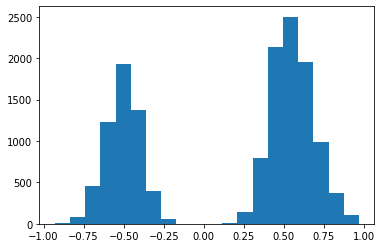

In [27]:
# Draw Histogram
plt.hist(ncc_pct_list, 20)
plt.show()

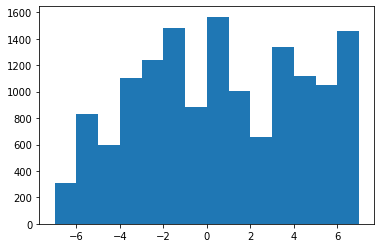

In [28]:
# Draw Histogram
plt.hist(lag_pct_list, 14)
plt.show()

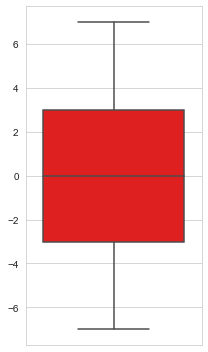

In [44]:
# Draw Boxplot
plt.subplots(1,1, figsize=(3,5))
sns.set_style('whitegrid')
sns.boxplot(lag_pct_list,color='red',orient='v')
plt.tight_layout()